### Домашнее задание

#  Анализ данных цен на обувь

<br><br>

В этом задании мы будем заниматься анализом данных цен на обувь в магазине ASOS. Потребуется воспользоваться всеми знаниями, полученными на курсе. Задание разделено на два блока:

1. Сбор данных
2. Анализ данных

Следуйте инструкциями, указанным ниже. В качестве результата вышлите архив с этим файлом и с csv-табличкой с данными.

<br><br>



## Часть 1. Сбор данных (6 баллов)

В этой части ДЗ мы соберём данные и построим табличку со всем позициями женской и мужской обуви. 

<br>

**Требуется**
* собрать данные о ценах на обувь с сайта ASOS
* составить таблицу `pd.DataFrame` со столбцами `title`, `price`, `price_sale`, `sex`.
* в этих столбцах хранятся
    * наименование позиции (`str`)
    * цена (`float`)
    * цена со скидкой, если есть (`float`). Если скидки нет, то ставьте пропуск с помощью `float('nan')`
    * Индикатор `male` для мужской обуви и `female` - для женской.

<br>


Даны ссылка на каталог всей имеющейся в магазине ASOS обуви для мужчин.

In [1]:
male_url = 'https://www.asos.com/ru/men/ctas/generiruemoe-promo/aktsiya-2/cat/?cid=28031&nlid=mw|%D0%B0%D0%BA%D1%86%D0%B8%D0%B8|ctas&page=1'

Такая же ссылка - для женской обуви.

In [2]:
female_url = 'https://www.asos.com/ru/women/ctas/generiruemoe-promo/aktsiya-2/cat/?cid=28022&nlid=ww|%D0%B0%D0%BA%D1%86%D0%B8%D0%B8|ctas&page=1'

Можно пройти по ссылками и убедиться.

In [3]:
print(male_url)

https://www.asos.com/ru/men/ctas/generiruemoe-promo/aktsiya-2/cat/?cid=28031&nlid=mw|%D0%B0%D0%BA%D1%86%D0%B8%D0%B8|ctas&page=1


In [4]:
print(female_url)

https://www.asos.com/ru/women/ctas/generiruemoe-promo/aktsiya-2/cat/?cid=28022&nlid=ww|%D0%B0%D0%BA%D1%86%D0%B8%D0%B8|ctas&page=1


<br>

Обратите внимание, что ссылки ведут только на начало каталога. Однако если вы посмотрите на конец URL, то увидете цифру 1. Заменив, эту цифру на 2, и перейдя по новой ссылке, мы попадём на вторую страницу каталога (убедитесь самостоятельно).

Таким образом, если мы умеем извлекать данные с одной страницы каталога, нам не составит труда сгенерировать ссылки для всех остальных страниц, пройтись по ним циклом, и собрать данные о ценнах всей имеющейся обуви.

Но давайте действовать последовательно. Начнём со вспомогательной функции. Обратите внимание, что цены на обувь на сайте отображаются в таком формате `2 890,00 руб.`, а нам необходимы объекты типа `float`. Давайте для начала реализуем функцию, которая превращает строку такого формата в число (например, получает на вход строку `2 890,00 руб.`, а возвращает число `2890`). 

In [5]:
def convert_price_to_num(price_str):
    return float(price_str.replace(' руб.', '').replace(' ', '').replace(',', '.').strip())
    

<br>

Теперь давайте научимся собирать данные хотя бы с одной страницы. Реализуйте функцию `get_data_from_asos_page`, которая на вход будет получать объект типа `bs4.BeautifulSoup`, построенный на одной странице каталога, а вернёт объект типа `pd.DataFrame` со столбцами `title`, `price` и `price_sale` (столбец `sex` добавим позже), где содержатся данные о позициях с этой страницы каталога.

<br>


In [6]:
import requests
from bs4 import BeautifulSoup

In [7]:
!pip install fake-useragent

In [8]:
from fake_useragent import UserAgent

In [9]:
import pandas as pd

In [10]:
def get_data_from_asos_page(soup):
    title_list = []
    price_list = []
    for i in range(m):
        title_list.append(soup(attrs = {'class': '_2qG85dG'})[i].p.text)
        price_list.append(convert_price_to_num(soup(attrs = {'class': '_2qG85dG'})[i].span.text))
    return pd.DataFrame({'title': title_list, 'price': price_list})

In [11]:
def collect_data(catalogue_start_url):

    """ 
    Собирает данные из выбранного раздела в датафрейм с 3 столбцами: title, price, price_sale 
    catalogue_start_url - ссылка url на первую страницу раздела, оканчивающаяся на 'page=1'

    """
    
    response = requests.get(catalogue_start_url, headers={'User-Agent': UserAgent().chrome})
    soup = BeautifulSoup(response.text) # soup первой страницы раздела
    
    def num_items(SOUP):
        """" 
        Определяет число элементов всего в разделе (N) и число элементов на каждой странице (m) 
        """
    
        soup_n = SOUP(attrs = {'class': "XmcWz6U"})[0]
        pos_1 = soup_n.text.find('ли ')
        pos_2 = soup_n.text.find('из ')
        pos_3 = soup_n.text.find(' товаров')
        N = int(soup_n.text[pos_2+3 : pos_3].replace(' ', ''))
        m = int(soup_n.text[pos_1+3 : pos_2].replace(' ', ''))
        return [N, m]
    
    def get_data_from_asos_page(SOUP):     
    
        """" 
        Собирает данные с выбранной страницы раздела
        SOUP - soup страницы url которой заканчивается на 'page=i', i = 1,2,3,..
    
        """
        title_list = []
        price_list = []
        sale_list = []
        
        s = SOUP(attrs = {'class': '_2qG85dG'})
        
        i = 0    
        
        while i <= len(s)-1:
            title_list.append(s[i].p.text)
            price_list.append(convert_price_to_num(s[i].span.text))
            try:
                sale_list.append(convert_price_to_num(s[i].find_all('span')[3].text))
            except:
                sale_list.append(0)
            i+=1
        return pd.DataFrame({'title': title_list, 'price': price_list, 'price_sale': sale_list})

    df = pd.DataFrame()
    
    for i in range(1, num_items(soup)[0]//num_items(soup)[1]+2):
        url = catalogue_start_url[:-1]+'{}'.format(str(i))
        response_ = requests.get(url, headers={'User-Agent': UserAgent().chrome})
        soup_ = BeautifulSoup(response_.text)
        df = pd.concat([df, get_data_from_asos_page(soup_)], axis = 0)

    return df.reset_index().iloc[:, 1:]

<br>

После того, как мы научились собирать данные с одной страницы каталога, нужно собрать всё, пройдя по всем страницам. Мы можем начать с первой страницы, и увеличивать число в конце URL, таким образом получая ссылки на следующую страницу каталога.

Однако, нам нужно в какой-то момент остановиться. Какой критерий мы можем выбрать для остановки?

Если Вы перейдёте в каталог по ссылке, то увидите внизу страницы кнопку "Загрузить ещё". Однако, эта кнопка присутсвует не на всех страницах каталога. Проведите эксперимент: 
* подсчитайте сколько позиций размещается на одной странице
* посмотрите сколько всего позиций в каталоге
* поделите одно число на другой, и узнайте, сколько страниц должно быть в каталоге
* перейдите на последнюю страницу каталога

Вы увидите, что на последней странице каталога кнопки "Загрузить ещё" нет, потому что загружать больше нечего. Таким образом, мы можем воспользоваться этой кнопкой как критерием. Если такая кнопка наличиствует на странице, мы можем двигаться дальше по каталогу. Если же такой кнопки нет, то мы достигли последней страницы, и после обработки её можем остановиться.

Давайте же реализуем вспомогательную функцию `has_next_page`, которая на вход будет принимать объект типа `bs4.BeautifulSoup`, а на выходе выдавать `True` или `False`, в зависимости от того, есть на странице кнопка "Загрузить ещё", или нет.

In [14]:
male_prices = collect_data(male_url)

In [15]:
female_prices = collect_data(female_url)

In [16]:
male_prices['gender'] = 'male'
female_prices['gender'] = 'female'

prices = pd.concat([male_prices, female_prices], ignore_index=True)

Табличку можно сохранить в файл, чтобы не пришлось опять извлекать данные, если Вы вдруг захотите сделать паузу.

In [17]:
# Сохраняем в файл
prices.to_csv('asos_prices.csv', index=None)

In [18]:
# Считываем из файла
prices = pd.read_csv('asos_prices.csv')

In [19]:
prices

,title,price,price_sale,gender
0,Низкие кожаные кроссовки белого цвета Nike Blazer,7299.0,4790.0,male
1,Джинсовые кроссовки Vans эксклюзивно для ASOS,5190.0,2890.0,male
2,Джинсовые кеды-слипоны Vans Classic эксклюзивн...,4890.0,3490.0,male
3,Синие кроссовки adidas Originals retroset,5990.0,4190.0,male
4,Кроссовки Reebok Pride Club C,5990.0,4190.0,male
...,...,...,...,...
1083,Бежевые кроссовки adidas Training Ultraboost 19,13690.0,10990.0,female
1084,Белые замшевые кроссовки с черными вставками R...,6990.0,5090.0,female
1085,Белый классический кроп-топ Puma,2190.0,1690.0,female
1086,Черный бюстгальтер с логотипом adidas Training,2190.0,1490.0,female


<br><br><br>

## Часть 2. Анализ (4 балла)

В этом блоке мы немного повизуализируем и поанализируем собранные данные. Тем, кто забыл, как рисовать графики, стоит пересмотреть лекцию с четвёртой недели курса.

Ответьте на вопросы и выполните следующие задания:

1. Нарисуйте гистограмму цен на товары для М и для Ж. Гистограммы для М и для Ж должны быть на одном графике. Добавье заголовок, подписи осей, легенду графика. Выберите нужный уровень прозрачности (см. параметр `alpha`), чтобы обе гистограммы были видны. Гистограммы должны быть нормализованные (см. параметр `density`)
2. Нарисуйте диаграмму рассеивания: "цена на товар" vs "цена на этот товар со скидкой". Не забудьте про заголовки и подписи осей.
3. Какой процент товаров со скидкой? А если смотреть только на мужские товары? А если только на женские?
4. Какова средняя скидка (в процентах)? Нарисуйте гистограмму. А средняя скидка в разрезе только мужских товаров? А только женских? Нарисуйте гистограмму для разрезов М/Ж (требования к гистограмме такие же, как в п. 1)
5. Каковая минимальная/средняя/максимальная цена за пару обуви? А 95-процентиль? А в разрезе М? А в разрезе Ж?
6. Можно ли утверждать, что цены на обувь распределены нормально?
7. Можно ли утверждать, что логарифмы от цен на обувь распределены нормально?
8. Можно ли утверждать, что средняя цена за пару обуви в мужской и в женской категориях одинакова?

Критерии:
* Полный и верный ответ на каждый вопрос приносит **0.5 баллов**.

In [20]:
# 1

import matplotlib.pyplot as plt
import numpy as np
plt.hist(prices[prices.gender == 'male'].price, bins=10, alpha = 0.3, density = True, color = 'blue')
plt.hist(prices[prices.gender == 'female'].price, bins=10, alpha = 0.3, density = True, color = 'red')
plt.xlabel("Интервалы")
plt.ylabel("Нормализованная частота")
plt.title('Гистограма цен для мужчин(синим) и женщин(красным)')

plt.show()

<Figure size 640x480 with 1 Axes>

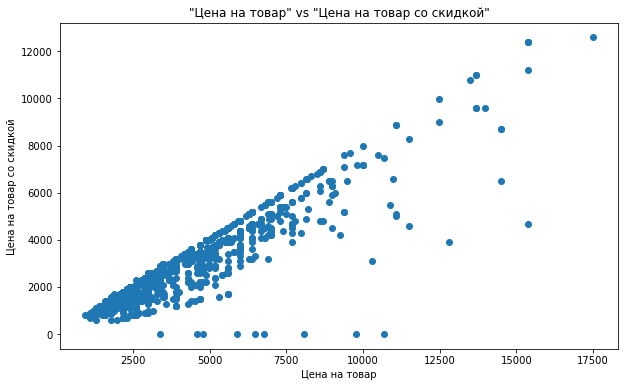

In [21]:
# 2

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = prices['price'], y = prices['price_sale'])
plt.xlabel("Цена на товар")
plt.ylabel("Цена на товар со скидкой")
plt.title('"Цена на товар" vs "Цена на товар со скидкой"')

plt.show()

In [22]:
# 3

# Процент мужских товаров со скидкой
disc = prices.price - prices.price_sale
male_pr = len(prices[prices.gender == 'male'][disc != 0]) / len(prices[prices.gender == 'male'].price_sale) 

print('male percent: ', male_pr)

# Процент женских товаров со скидкой
female_pr = len(prices[prices.gender == 'female'][disc != 0]) / len(prices[prices.gender == 'female'].price_sale) 
print('female percent: ', male_pr)

# Так как взяли категорию товаров по акции то оба числа будут равны 1

male percent:  1.0
female percent:  1.0


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [23]:
# 4

In [24]:
prices['disc(%)'] = (prices.price-prices.price_sale)/prices.price * 100

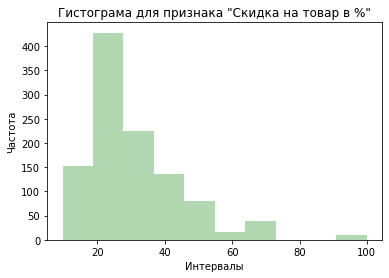

In [25]:
plt.hist(prices['disc(%)'], bins=10, color = 'green', alpha = 0.3)
plt.xlabel("Интервалы")
plt.ylabel("Частота")
plt.title('Гистограма для признака "Скидка на товар в %"')

plt.show()

In [26]:
print('Средняя скидка в процентах: {0:.2f} %'.format(prices['disc(%)'].mean(), ))
print('Средняя скидка в процентах для мужских товаров: {0:.2f} %'.format(prices[prices.gender == 'male']['disc(%)'].mean(), ))
print('Средняя скидка в процентах для женских товаров: {0:.2f} %'.format(prices[prices.gender == 'female']['disc(%)'].mean(), ))

Средняя скидка в процентах: 30.98 %
Средняя скидка в процентах для мужских товаров: 32.60 %
Средняя скидка в процентах для женских товаров: 29.87 %


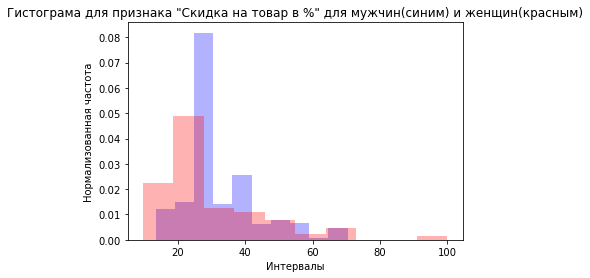

In [27]:
plt.hist(prices[prices.gender == 'male']['disc(%)'], bins=10, alpha = 0.3, density = True, color = 'blue')
plt.hist(prices[prices.gender == 'female']['disc(%)'], bins=10, alpha = 0.3, density = True, color = 'red')
plt.xlabel("Интервалы")
plt.ylabel("Нормализованная частота")
plt.title('Гистограма для признака "Скидка на товар в %" для мужчин(синим) и женщин(красным)')

plt.show()

In [28]:
# 5
# Для всех товаров
print('Для всех товаров:')
print('Минимальная стоимость товара: {0:.2f} рублей'.format(prices.price.describe()[3]))
print('Максимальная стоимость товара: {0:.2f} рублей'.format(prices.price.describe()[7]))
print('Средняя стоимость товара: {0:.2f} рублей'.format(prices.price.describe()[1]))
print('95-% перцентиль для стоимости товара: {0:.2f} рублей'.format(prices.price.quantile(0.95)))

# В разрезе мужчин
print('\n')
print("В разрезе мужчин:")
print('Минимальная стоимость товара: {0:.2f} рублей'.format(prices[prices.gender == 'male'].price.describe()[3]))
print('Максимальная стоимость товара: {0:.2f} рублей'.format(prices[prices.gender == 'male'].price.describe()[7]))
print('Средняя стоимость товара: {0:.2f} рублей'.format(prices[prices.gender == 'male'].price.describe()[1]))
print('95-% перцентиль для стоимости товара: {0:.2f} рублей'.format(prices[prices.gender == 'male'].price.quantile(0.95)))

# В разрезе женщин
print('\n')
print("В разрезе женщин:")
print('Минимальная стоимость товара: {0:.2f} рублей'.format(prices[prices.gender == 'female'].price.describe()[3]))
print('Максимальная стоимость товара: {0:.2f} рублей'.format(prices[prices.gender == 'female'].price.describe()[7]))
print('Средняя стоимость товара: {0:.2f} рублей'.format(prices[prices.gender == 'female'].price.describe()[1]))
print('95-% перцентиль для стоимости товара: {0:.2f} рублей'.format(prices[prices.gender == 'female'].price.quantile(0.95)))

Для всех товаров:
Минимальная стоимость товара: 950.00 рублей
Максимальная стоимость товара: 17490.00 рублей
Средняя стоимость товара: 4205.05 рублей
95-% перцентиль для стоимости товара: 8690.00 рублей


В разрезе мужчин:
Минимальная стоимость товара: 950.00 рублей
Максимальная стоимость товара: 15390.00 рублей
Средняя стоимость товара: 4087.35 рублей
95-% перцентиль для стоимости товара: 8140.00 рублей


В разрезе женщин:
Минимальная стоимость товара: 1090.00 рублей
Максимальная стоимость товара: 17490.00 рублей
Средняя стоимость товара: 4285.58 рублей
95-% перцентиль для стоимости товара: 8962.50 рублей


In [29]:
# 6 - 7

# Проверка распределения цен на нормальность
# Воспользуемся тестом Шапиро-Уилка
# Нулевая гипотеза теста: данные принадлежат нормальному распределению
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution
# Возьмем стандартное альфа = 0.05 (при желании можно изменить)
alpha = 0.05
from scipy import stats

def Shapiro(series):
    shapiro_test = stats.shapiro(series)
    if shapiro_test[1] < alpha:
        return ('Цены распределены не нормально, нулевая гипотеза отвергается с вероятностью ошибки'+
      ' alpha = {0}, (p-value = {1:} < {2})'.format(str(alpha), "%.4f" % float(str(float(shapiro_test[1]))), str(alpha)))
    else:
        return ('Цены распределены нормально, нулевая гипотеза не отвергается на уровне значимости'+
      ' alpha = {0}, (p-value = {1:} > {2})'.format(str(alpha), "%.4f" % float(str(float(shapiro_test[1]))), str(alpha)))

print('Для изначальных данных: \n', Shapiro(prices.price))
print('\n')
print('Для логарифмов \n', Shapiro(np.log(prices.price)))

Для изначальных данных: 
 Цены распределены не нормально, нулевая гипотеза отвергается с вероятностью ошибки alpha = 0.05, (p-value = 0.0000 < 0.05)


Для логарифмов 
 Цены распределены не нормально, нулевая гипотеза отвергается с вероятностью ошибки alpha = 0.05, (p-value = 0.0000 < 0.05)


In [30]:
# 8

# Для сравнения цен проведем тест Стьюдента для 2 выборок. 
# Для этого необходимо, чтоб соблюдались предпосылки о нормальности, независимости и гомогенности дисперсий
# Независимость соблюдается, так как берем данные из общей выборки
# Нормальность не соблюдается (но ей можно пренебречь)
# Гомогенность дисперсий проверим спомощью теста Левина, который устойчив к отклонениям от нормальности
# Если дисперсии не равны, то используем t-test Уэлча (с корректировкой на неравенство дисперсий)

def Levene(series1, series2):
    levene_test = stats.levene(series1, series2)
    
    if levene_test[1] < alpha:
        return ('Дисперсии выборок не равны, нулевая гипотеза отвергается с вероятностью ошибки'+
      ' alpha = {0}, (p-value = {1:} < {2}). Нарушается предпосылка теста Стьюдента.'.format(str(alpha), "%.4f" % float(str(float(levene_test[1]))), str(alpha)))
    else:
        return ('Дисперсии выборок равны (выборки исходят из одной и той же генеральной совокупности),' 
                +' нулевая гипотеза не отвергается на уровне значимости'+
      ' alpha = {0}, (p-value = {1:} > {2}). Можно использовать тест Стьюдента.'.format(str(alpha), "%.4f" % float(str(float(levene_test[1]))), str(alpha)))

Levene(prices[prices.gender == 'male'].price, prices[prices.gender == 'female'].price)

'Дисперсии выборок равны (выборки исходят из одной и той же генеральной совокупности), нулевая гипотеза не отвергается на уровне значимости alpha = 0.05, (p-value = 0.3385 > 0.05). Можно использовать тест Стьюдента.'

In [31]:
# Если пренебречь предпосылкой о нормальности, сославшись на центральную предельную теорему (ЦПТ)

def ttest(series1, series2):
    t_test = stats.ttest_ind(series1, series2)
    if t_test[1] < alpha:
        return ('Средние значения выборок статистически не равны между собой, нулевая гипотеза отвергается с вероятностью ошибки'+
      ' alpha = {0}, (p-value = {1:} < {2})'.format(str(alpha), "%.4f" % float(str(float(t_test[1]))), str(alpha)))
    else:
        return ('Различия в средних значениях для 2 выборок статистически не значимы,' 
                +' нулевая гипотеза не отвергается на уровне значимости'+
      ' alpha = {0}, (p-value = {1:} > {2})'.format(str(alpha), "%.4f" % float(str(float(t_test[1]))), str(alpha)))

ttest(prices[prices.gender == 'male'].price, prices[prices.gender == 'female'].price)

'Различия в средних значениях для 2 выборок статистически не значимы, нулевая гипотеза не отвергается на уровне значимости alpha = 0.05, (p-value = 0.1962 > 0.05)'

In [32]:
# Если не пренебрегать предпосылкой о нормальности

# Нарушается предпосылка о нормальности для теста Стьюдента (строго говоря не можем его использовать)
# Не можем сравнить средние, чтоб p-value и значения статистики были достоверные
# Используем непараметрический тест Манна-Уитни 
# Но строго говоря, тест сравнивает распределения, а не средние выборок 
# Поэтому по сути не отвечаем на вопрос задания

def MW_test(series1, series2):
    mv_test = stats.mannwhitneyu(series1, series2)
    if mv_test[1] < alpha:
        return ('Вероятность того, что случайно выбранное значение из 1 выборки больше случайно выбранного значения из 2 выборки' 
                ' не равна вероятности того, что случайно выбранное значение из 2 выборки больше, чем случайно выбранное значение из' 
                ' 1 выборки, нулевая гипотеза отвергается с вероятностью ошибки'+
      ' alpha = {0}, (p-value = {1:} < {2})'.format(str(alpha), "%.4f" % float(str(float(mv_test[1]))), str(alpha)))
    else:
        return ('Вероятность того, что случайно выбранное значение из 1 выборки больше случайно выбранного значения из 2 выборки' 
                ' равна вероятности того, что случайно выбранное значение из 2 выборки больше, чем случайно выбранное значение из' 
                ' 1 выборки, нулевая гипотеза не отвергается на уровне значимости'+
      ' alpha = {0}, (p-value = {1:} > {2})'.format(str(alpha), "%.4f" % float(str(float(mv_test[1]))), str(alpha)))
MW_test(prices[prices.gender == 'male'].price, prices[prices.gender == 'female'].price)

'Вероятность того, что случайно выбранное значение из 1 выборки больше случайно выбранного значения из 2 выборки равна вероятности того, что случайно выбранное значение из 2 выборки больше, чем случайно выбранное значение из 1 выборки, нулевая гипотеза не отвергается на уровне значимости alpha = 0.05, (p-value = 0.1499 > 0.05)'